### The **Red Wine Quality dataset** on Kaggle consists of various physicochemical properties of red wine, which are used to predict its quality. It has 12 columns in total, with **11 input features** and **1 target variable**. Here's a breakdown of the columns:

### Input Features:
1. **Fixed Acidity** - Acids present in wine that do not evaporate easily.
2. **Volatile Acidity** - Acids that contribute to vinegar-like taste; too much can be undesirable.
3. **Citric Acid** - Adds freshness and flavor; a natural acid in wines.
4. **Residual Sugar** - The amount of sugar left after fermentation; it can influence sweetness.
5. **Chlorides** - Salt level in the wine, impacting the taste.
6. **Free Sulfur Dioxide** - Acts as a preservative to prevent microbial growth.
7. **Total Sulfur Dioxide** - Sum of all sulfur dioxide forms; high amounts can affect taste.
8. **Density** - Density of the wine, closely related to alcohol and sugar content.
9. **pH** - Acidity level of the wine.
10. **Sulphates** - Contributes to the wine's stability and taste.
11. **Alcohol** - Alcohol content by volume.

### Target Variable:
- **Quality** - The target variable, which is a score between 0 and 10 representing the wine's quality as judged by experts.

### Problem Statement:
The primary task is to **predict the quality of the wine** based on its physicochemical properties. This can be treated either as a **classification problem** (predicting discrete quality levels) or a **regression problem** (predicting a continuous quality score).

### Relationships Between Variables:
Many of these features can correlate with each other and influence the overall quality. For example:
- **Alcohol, pH, and Residual Sugar** could have a direct impact on the taste, influencing the quality score.
- **Volatile Acidity** and **Citric Acid** can balance the wine’s sharpness or sweetness.

### Suggested Machine Learning Models:
- **For Classification**: Since the quality is typically rounded to a discrete integer score, classification models like **Random Forest** or **Logistic Regression** can be used to predict discrete quality levels.
- **For Regression**: If you want to predict a more nuanced score, **XGBoost**, **Linear Regression**, or **Random Forest Regressor** are suitable models. Regression is useful when you're dealing with continuous target values, allowing you to capture subtle variations in quality.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
dataset = pd.read_csv("winequality-red.csv")
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Observation - There are no null values present in the dataset.

In [7]:
# Printng shape of the dataset
print("The number of ROWS in the dataset: ", dataset.shape[0])
print("The number of COLUMNS in the dataset: ", dataset.shape[1])

The number of ROWS in the dataset:  1599
The number of COLUMNS in the dataset:  12


### Performing BIVARIATE Analysis on the columns in this dataset

#### 1. Quality and Fixed Acidity

Bar plot between Quality and Fixed Acidity: 


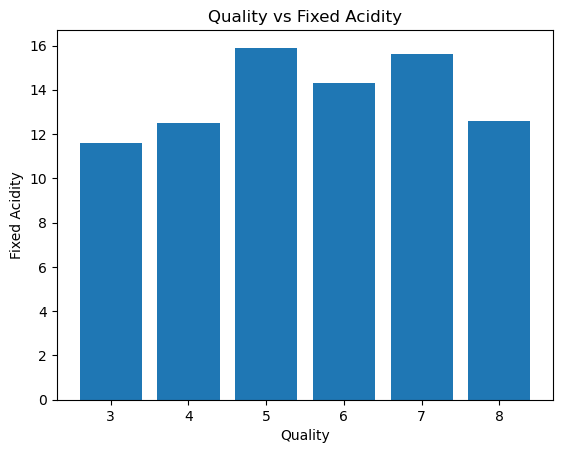

In [8]:
print("Bar plot between Quality and Fixed Acidity: ")
plt.bar(dataset['quality'], dataset['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Quality vs Fixed Acidity')
plt.show()

##### Observation - The quality of wine improves as its fixed acidity increases.

#### 2. Quality and Volatile Acidity

Bar plot between Quality and Volatile Acidity: 


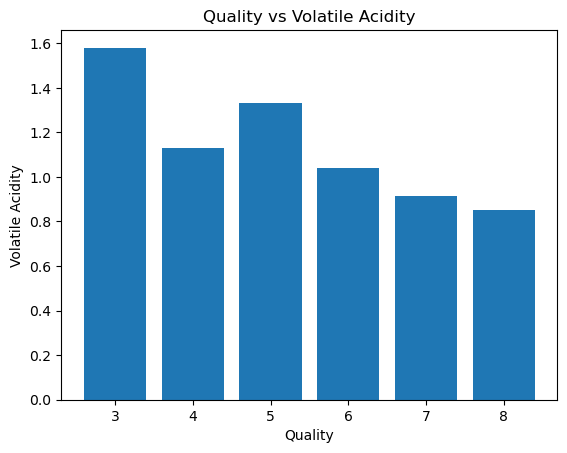

In [9]:
print("Bar plot between Quality and Volatile Acidity: ")
plt.bar(dataset['quality'], dataset['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Quality vs Volatile Acidity')
plt.show()

##### Observation - Volatile acidity is inversely propotional to wine quality. As volatility of the wine increases, its quality decreases.

#### 3. Quality and Residual Sugar

Bar plot between Quality and Residual sugar: 


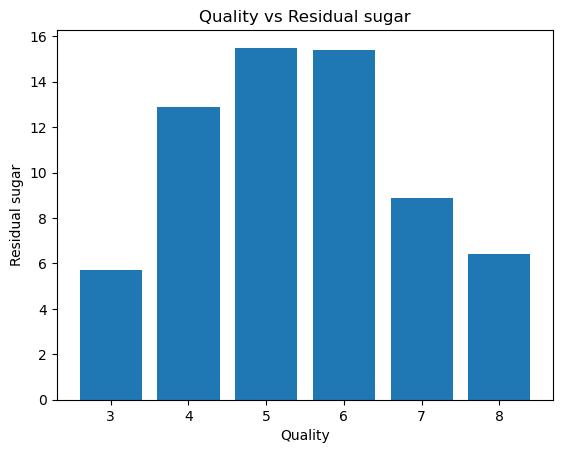

In [10]:
print("Bar plot between Quality and Residual sugar: ")
plt.bar(dataset['quality'], dataset['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual sugar')
plt.title('Quality vs Residual sugar')
plt.show()

#### 4. Quality and Chlorides

Bar plot between Quality and Chlorides: 


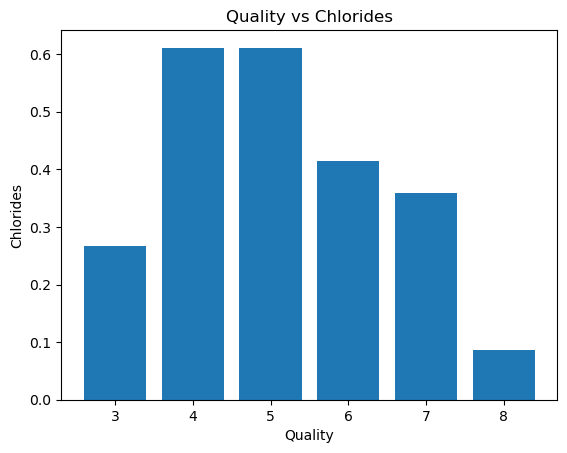

In [11]:
print("Bar plot between Quality and Chlorides: ")
plt.bar(dataset['quality'], dataset['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.title('Quality vs Chlorides')
plt.show()

##### Observation -  The more chlorides present the better the wine quality.

#### 5. Quality and Total sulphur dioxide

Bar plot between Quality and Total sulfur dioxide: 


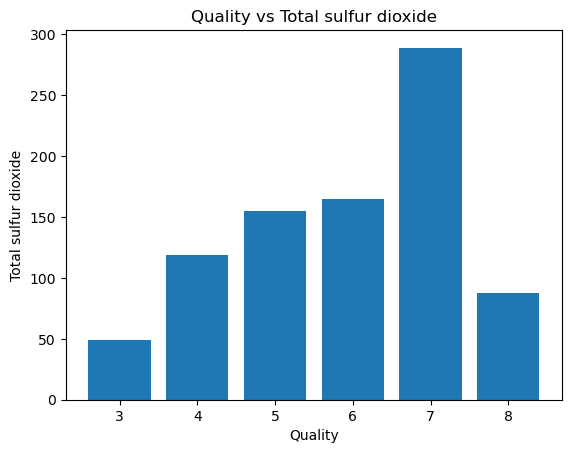

In [12]:
print("Bar plot between Quality and Total sulfur dioxide: ")
plt.bar(dataset['quality'], dataset['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total sulfur dioxide')
plt.title('Quality vs Total sulfur dioxide')
plt.show()

##### Observation - There isn't too much correlation between total sulfur dioxide and quality.

#### 6. Quality and Alcohol

Bar plot between Quality and Alcohol: 


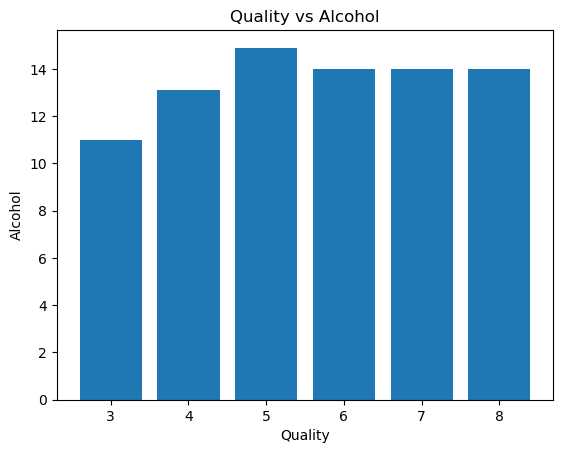

In [13]:
print("Bar plot between Quality and Alcohol: ")
plt.bar(dataset['quality'], dataset['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Quality vs Alcohol')
plt.show()

##### Observation - The more alcohol present in the wine the better the wine quality.

### Correlation matrix to further understand the relationships between the variables.

<Axes: >

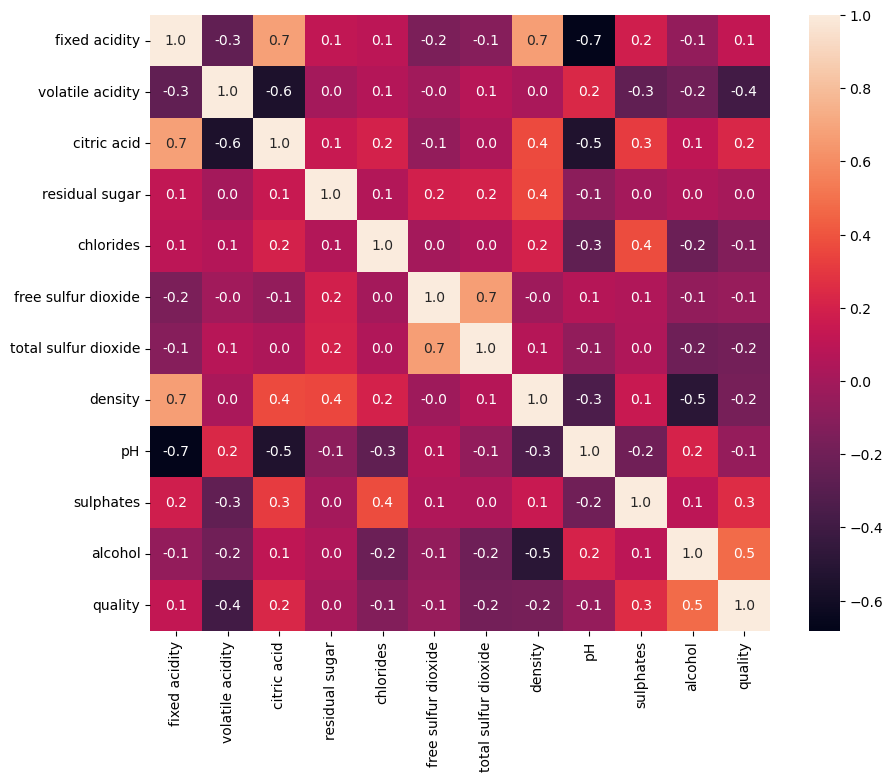

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f')

#### BINARIZATION of the target variable - 'quality'
##### To convert its values into two categories, typically represented as 0 and 1.

In [15]:
print("Unique values present in the quality variable are: ", dataset['quality'].unique())
print("Total number of unique values present in the quality variable are: ", dataset['quality'].nunique())

Unique values present in the quality variable are:  [5 6 7 4 8 3]
Total number of unique values present in the quality variable are:  6


In [16]:
print("Performing binarization using list comprehension...")
dataset['quality'] = [1 if x>=7 else 0 for x in dataset['quality']]

Performing binarization using list comprehension...


In [17]:
dataset['quality'].unique()

array([0, 1], dtype=int64)

In [19]:
print("Checking distribution in the target variable: quality")
print(dataset['quality'].value_counts())

Checking distribution in the target variable: quality
0    1382
1     217
Name: quality, dtype: int64


##### Observation - The dataset is imbalanced since most wine quality is 0

### Storing independent variables in X and dependet variable 'quality' in y

In [21]:
X = dataset.drop('quality', axis=1)
y = dataset['quality']

In [22]:
print("Independent variables ", X)
print("Dependent variables ", y)

Independent variables        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

    

#### Handling our imbalanced dataset - using the oversampling technique, SMOTE, which aims to balance class distribution by randomly increasing the minority class examples by replacing them with their synthetic data points it generates, NO duplicates.

In [23]:
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)

In [25]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

##### Now there's even distribution for minority class and majority class 

### Splitting the dataset into training and testing data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

### Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

print("Creating an instance of the Standard Scaler...")
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

Creating an instance of the Standard Scaler...


In [28]:
X_train

array([[-0.75412704, -0.66112588,  0.71946828, ...,  0.6828032 ,
         0.9389474 ,  0.09098943],
       [-0.80632446,  0.2145901 , -0.59853543, ...,  0.59128437,
        -0.1086259 , -0.10481455],
       [ 0.70236201,  2.44532621, -0.36474338, ...,  0.75104581,
        -0.20622709,  0.26659516],
       ...,
       [ 0.31023034,  0.77262124, -1.65547154, ..., -0.81853411,
        -0.46071031, -0.43582778],
       [-0.19393894,  0.98170936, -1.13918028, ..., -0.06786545,
         0.30273935,  0.00318656],
       [-0.75412704,  0.89210016, -1.34569678, ...,  1.43347186,
        -1.03329755, -1.22605359]])

### Applying Principal Component Analysis (PCA)
#### PCA is a dimension reduction method, used to reduce the dimensions of a large dataset by transforming a large set of variables into a smaller one, while maintaining information from the large set

In [29]:
from sklearn.decomposition import PCA

print("Creating instance of PCA...")
pca = PCA(n_components = 0.90) # Retain 90% of the info

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

Creating instance of PCA...


In [30]:
sum(pca.explained_variance_ratio_)

0.9197286156165367

In [31]:
pca.explained_variance_ratio_

array([0.29265073, 0.19043816, 0.15513233, 0.09290302, 0.08350881,
       0.05726787, 0.04782769])

### Logistic Regression
#### Since this is a classification problem

In [32]:
from sklearn.linear_model import LogisticRegression

print("Creating instance of Logistic Regression...")

log_reg = LogisticRegression()
print("Training the model...")
log_reg.fit(X_train, y_train)

Creating instance of Logistic Regression...
Training the model...


LogisticRegression()

In [33]:
y_pred1 = log_reg.predict(X_test)

#### Checking accuracy of our prediction from the Logistic Regression model

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The ACCURACY SCORE of our Logistic Regression model is: ", accuracy_score(y_test, y_pred1))

print("The PRECISION SCORE of our Logistic Regression model is: ", precision_score(y_test, y_pred1))

print("The RECALL SCORE of our Logistic Regression model is: ", recall_score(y_test, y_pred1))

print("The F1 SCORE of our Logistic Regression model is: ", f1_score(y_test, y_pred1))

The ACCURACY SCORE of our Logistic Regression model is:  0.755877034358047
The PRECISION SCORE of our Logistic Regression model is:  0.7360594795539034
The RECALL SCORE of our Logistic Regression model is:  0.7557251908396947
The F1 SCORE of our Logistic Regression model is:  0.7457627118644069


### Using Support Vector Classifier (SVC)

In [35]:
from sklearn import svm

In [36]:
print("Creating instance of SVC...")

svm = svm.SVC()

Creating instance of SVM...


In [38]:
print("Training our SVC model...")
svm.fit(X_train, y_train)

Training our SVC model...


SVC()

In [39]:
print("Performing prediction on our untrained data...")
y_pred2 = svm.predict(X_test)
y_pred2

Performing prediction on our untrained data...


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [40]:
print("The ACCURACY SCORE of our SVC model is: ", accuracy_score(y_test, y_pred2))

print("The PRECISION SCORE of our SVC model is: ", precision_score(y_test, y_pred2))

print("The RECALL SCORE of our SVC model is: ", recall_score(y_test, y_pred2))

print("The F1 SCORE of our SVC model is: ", f1_score(y_test, y_pred2))

The ACCURACY SCORE of our SVC model is:  0.7667269439421338
The PRECISION SCORE of our SVC model is:  0.7587548638132295
The RECALL SCORE of our SVC model is:  0.7442748091603053
The F1 SCORE of our SVC model is:  0.7514450867052023


### Using the K-Neighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
print("Creating instance of KNeighborsClassifier...")
knn = KNeighborsClassifier()

Creating instance of KNeighborsClassifier...


In [43]:
print("Training our KNeighborsClassifier model...")
knn.fit(X_train, y_train)

Training our KNeighborsClassifier model...


KNeighborsClassifier()

In [44]:
print("Predicting the values of target variable using our trained KNeighborsClassifier model...")
y_pred3 = knn.predict(X_test)

Predicting the values of target variable using our trained KNeighborsClassifier model...


In [45]:
print("The ACCURACY SCORE of our KNN model is: ", accuracy_score(y_test, y_pred3))

print("The PRECISION SCORE of our KNN model is: ", precision_score(y_test, y_pred3))

print("The RECALL SCORE of our KNN model is: ", recall_score(y_test, y_pred3))

print("The F1 SCORE of our KNN model is: ", f1_score(y_test, y_pred3))

The ACCURACY SCORE of our KNN model is:  0.6943942133815552
The PRECISION SCORE of our KNN model is:  0.6728624535315985
The RECALL SCORE of our KNN model is:  0.6908396946564885
The F1 SCORE of our KNN model is:  0.6817325800376647


### Using the Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
print("Creating instance of DecisionTreeClassifier...")
des_tree = DecisionTreeClassifier()

Creating instance of DecisionTreeClassifier...


In [48]:
print("Training our DecisionTreeClassifier model...")
des_tree.fit(X_train, y_train)

Training our DecisionTreeClassifier model...


DecisionTreeClassifier()

In [49]:
print("Predicting the values of target variable using our trained DecisionTreeClassifier model...")
y_pred4 = des_tree.predict(X_test)

Predicting the values of target variable using our trained DecisionTreeClassifier model...


In [50]:
print("The ACCURACY SCORE of our DecisionTreeClassifier model is: ", accuracy_score(y_test, y_pred4))

print("The PRECISION SCORE of our DecisionTreeClassifier model is: ", precision_score(y_test, y_pred4))

print("The RECALL SCORE of our DecisionTreeClassifier model is: ", recall_score(y_test, y_pred4))

print("The F1 SCORE of our DecisionTreeClassifier model is: ", f1_score(y_test, y_pred4))

The ACCURACY SCORE of our DecisionTreeClassifier model is:  0.7088607594936709
The PRECISION SCORE of our DecisionTreeClassifier model is:  0.7224669603524229
The RECALL SCORE of our DecisionTreeClassifier model is:  0.6259541984732825
The F1 SCORE of our DecisionTreeClassifier model is:  0.670756646216769


### Using the Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
print("Creating instance of RandomForestClassifier...")
rand_forest = RandomForestClassifier()

Creating instance of RandomForestClassifier...


In [53]:
print("Training our RandomForestClassifier model...")
rand_forest.fit(X_train, y_train)

Training our RandomForestClassifier model...


RandomForestClassifier()

In [54]:
print("Predicting the values of target variable using our trained RandomForestClassifier model...")
y_pred5 = rand_forest.predict(X_test)

Predicting the values of target variable using our trained RandomForestClassifier model...


In [55]:
print("The ACCURACY SCORE of our RandomForestClassifier model is: ", accuracy_score(y_test, y_pred5))

print("The PRECISION SCORE of our RandomForestClassifier model is: ", precision_score(y_test, y_pred5))

print("The RECALL SCORE of our RandomForestClassifier model is: ", recall_score(y_test, y_pred5))

print("The F1 SCORE of our RandomForestClassifier model is: ", f1_score(y_test, y_pred5))

The ACCURACY SCORE of our RandomForestClassifier model is:  0.7377938517179023
The PRECISION SCORE of our RandomForestClassifier model is:  0.7746478873239436
The RECALL SCORE of our RandomForestClassifier model is:  0.6297709923664122
The F1 SCORE of our RandomForestClassifier model is:  0.6947368421052631


### Using the Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
print("Creating instance of GradientBoostingClassifier...")
grad_boost = GradientBoostingClassifier()

Creating instance of GradientBoostingClassifier...


In [58]:
print("Training our GradientBoostingClassifier model...")
grad_boost.fit(X_train, y_train)

Training our GradientBoostingClassifier model...


GradientBoostingClassifier()

In [59]:
print("Predicting the values of target variable using our trained GradientBoostingClassifier model...")
y_pred6 = grad_boost.predict(X_test)

Predicting the values of target variable using our trained GradientBoostingClassifier model...


In [60]:
print("The ACCURACY SCORE of our GradientBoostingClassifier model is: ", accuracy_score(y_test, y_pred6))

print("The PRECISION SCORE of our GradientBoostingClassifier model is: ", precision_score(y_test, y_pred6))

print("The RECALL SCORE of our GradientBoostingClassifier model is: ", recall_score(y_test, y_pred6))

print("The F1 SCORE of our GradientBoostingClassifier model is: ", f1_score(y_test, y_pred6))

The ACCURACY SCORE of our GradientBoostingClassifier model is:  0.7522603978300181
The PRECISION SCORE of our GradientBoostingClassifier model is:  0.7551020408163265
The RECALL SCORE of our GradientBoostingClassifier model is:  0.7061068702290076
The F1 SCORE of our GradientBoostingClassifier model is:  0.7297830374753451


### Visualizing the results to find the best model

#### 1. Accuracy score

In [75]:
accuracy_scores = [
    accuracy_score(y_test, y_pred1) * 100,  # Log_Reg
    accuracy_score(y_test, y_pred2) * 100,  # SVC
    accuracy_score(y_test, y_pred3) * 100,  # KNN
    accuracy_score(y_test, y_pred4) * 100,  # Decision_Tree
    accuracy_score(y_test, y_pred5) * 100,  # Random_Forest
    accuracy_score(y_test, y_pred6) * 100   # Gradient_Boost
]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': ['Log_Reg', 'SVC', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient_Boost'],
    'Accuracy_Score': accuracy_scores
})

print(results_df)


            Model  Accuracy_Score
0         Log_Reg       75.587703
1             SVC       76.672694
2             KNN       69.439421
3   Decision_Tree       70.886076
4   Random_Forest       73.779385
5  Gradient_Boost       75.226040


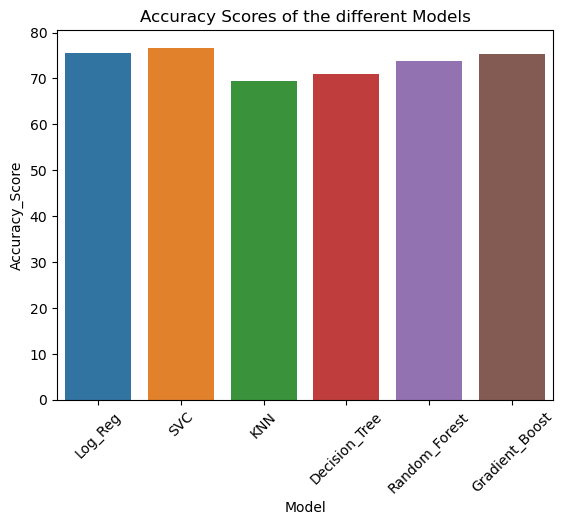

In [78]:
sns.barplot(x='Model', y='Accuracy_Score', data=results_df)
plt.xticks(rotation=45)
plt.title("Accuracy Scores of the different Models")
plt.show()

#### 2. Precision Score

In [79]:
precision_scores = [
    precision_score(y_test, y_pred1) * 100,  # Log_Reg
    precision_score(y_test, y_pred2) * 100,  # SVC
    precision_score(y_test, y_pred3) * 100,  # KNN
    precision_score(y_test, y_pred4) * 100,  # Decision_Tree
    precision_score(y_test, y_pred5) * 100,  # Random_Forest
    precision_score(y_test, y_pred6) * 100   # Gradient_Boost
]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': ['Log_Reg', 'SVC', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient_Boost'],
    'Precision_Score': precision_scores
})

print(results_df)


            Model  Precision_Score
0         Log_Reg        73.605948
1             SVC        75.875486
2             KNN        67.286245
3   Decision_Tree        72.246696
4   Random_Forest        77.464789
5  Gradient_Boost        75.510204


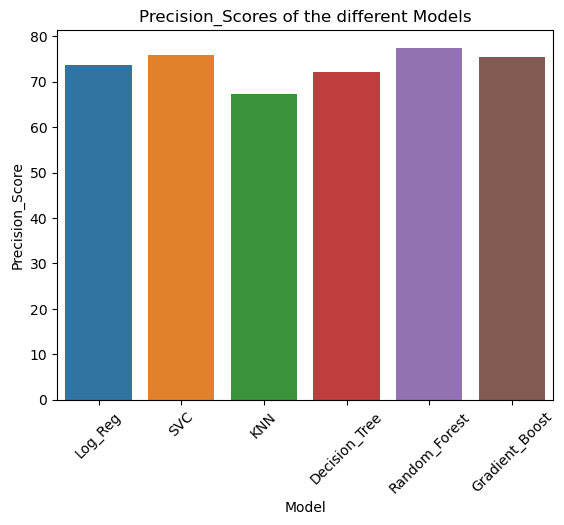

In [80]:
sns.barplot(x='Model', y='Precision_Score', data=results_df)
plt.xticks(rotation=45)
plt.title("Precision_Scores of the different Models")
plt.show()

#### 3. Recall Score

In [81]:
recall_scores = [
    recall_score(y_test, y_pred1) * 100,  # Log_Reg
    recall_score(y_test, y_pred2) * 100,  # SVC
    recall_score(y_test, y_pred3) * 100,  # KNN
    recall_score(y_test, y_pred4) * 100,  # Decision_Tree
    recall_score(y_test, y_pred5) * 100,  # Random_Forest
    recall_score(y_test, y_pred6) * 100   # Gradient_Boost
]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': ['Log_Reg', 'SVC', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient_Boost'],
    'Recall_Score': recall_scores
})

print(results_df)


            Model  Recall_Score
0         Log_Reg     75.572519
1             SVC     74.427481
2             KNN     69.083969
3   Decision_Tree     62.595420
4   Random_Forest     62.977099
5  Gradient_Boost     70.610687


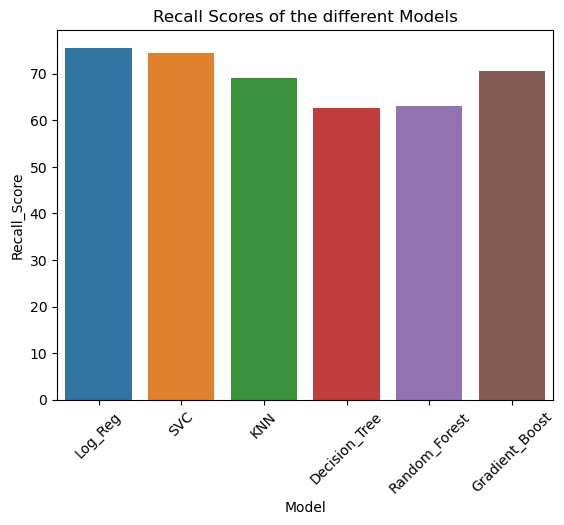

In [82]:
sns.barplot(x='Model', y='Recall_Score', data=results_df)
plt.xticks(rotation=45)
plt.title("Recall Scores of the different Models")
plt.show()

#### 4. F1 Score

In [83]:
F1_scores = [
    f1_score(y_test, y_pred1) * 100,  # Log_Reg
    f1_score(y_test, y_pred2) * 100,  # SVC
    f1_score(y_test, y_pred3) * 100,  # KNN
    f1_score(y_test, y_pred4) * 100,  # Decision_Tree
    f1_score(y_test, y_pred5) * 100,  # Random_Forest
    f1_score(y_test, y_pred6) * 100   # Gradient_Boost
]

# Create DataFrame
results_df = pd.DataFrame({
    'Model': ['Log_Reg', 'SVC', 'KNN', 'Decision_Tree', 'Random_Forest', 'Gradient_Boost'],
    'F1_Score': F1_scores
})

print(results_df)


            Model   F1_Score
0         Log_Reg  74.576271
1             SVC  75.144509
2             KNN  68.173258
3   Decision_Tree  67.075665
4   Random_Forest  69.473684
5  Gradient_Boost  72.978304


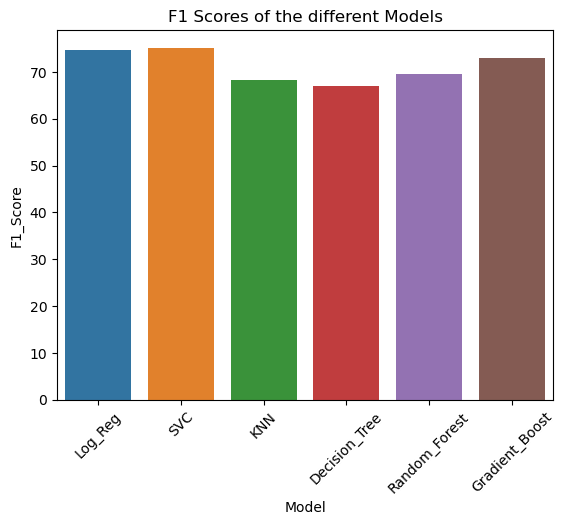

In [84]:
sns.barplot(x='Model', y='F1_Score', data=results_df)
plt.xticks(rotation=45)
plt.title("F1 Scores of the different Models")
plt.show()

#### Basing on Accuracy Score and Precision Score, Random Forest is the better option